In [2]:
import csv
from faker import Faker
import random

fake = Faker()

# Helper function to generate unique values for primary keys
def generate_unique_ids(existing_ids, total_ids):
    unique_ids = set(existing_ids)
    while len(unique_ids) < total_ids:
        unique_ids.add(fake.random_int(min=1, max=total_ids))
    return list(unique_ids)

# Set the number of rows for each table
num_dietary_preferences = 5
num_allergies = 10
num_cuisines = 8
num_user_preferences = 50
num_user_profiles = 50
num_user_inventories = 50
num_ingredient_inventories = 100
num_is_restricted_by = 100
num_recipes = 50
num_contains = 150
num_cooking_instructions = 50
num_suggestions = 50
num_rate_by = 50
num_includes = 100

# Generate unique IDs for primary keys
dietary_preference_ids = generate_unique_ids([], num_dietary_preferences)
allergy_ids = generate_unique_ids([], num_allergies)
cuisine_ids = generate_unique_ids([], num_cuisines)
user_preference_ids = generate_unique_ids([], num_user_preferences)
user_profile_ids = generate_unique_ids([], num_user_profiles)
user_inventory_ids = generate_unique_ids([], num_user_inventories)
ingredient_inventory_ids = generate_unique_ids([], num_ingredient_inventories)
is_restricted_by_ids = generate_unique_ids([], num_is_restricted_by)
recipe_ids = generate_unique_ids([], num_recipes)
contains_ids = generate_unique_ids([], num_contains)
cooking_instruction_ids = generate_unique_ids([], num_cooking_instructions)
suggestion_ids = generate_unique_ids([], num_suggestions)
rate_by_ids = generate_unique_ids([], num_rate_by)
includes_ids = generate_unique_ids([], num_includes)

# Generate data for Dietary_preference Table
dietary_preference_data = [(dietary_preference_id, fake.word()) for dietary_preference_id in dietary_preference_ids]

# Generate data for Allergies Table
allergies_data = [(allergy_id, fake.word()) for allergy_id in allergy_ids]

# Generate data for Cuisines Table
cuisines_data = [(cuisine_id, fake.word()) for cuisine_id in cuisine_ids]

# Generate data for User_preference Table
user_preference_data = [(user_preference_id, fake.random_int(min=1, max=num_user_inventories)) for user_preference_id in user_preference_ids]

# Generate data for User_profile Table
user_profile_data = [
    (user_profile_id, fake.first_name(), fake.last_name(), fake.password(), fake.phone_number(), fake.email(),
     fake.random_int(min=1, max=num_user_preferences)) for user_profile_id in user_profile_ids
]

# Generate data for User_inventory Table
user_inventory_data = [(user_inventory_id, fake.random_int(min=1, max=num_user_profiles)) for user_inventory_id in user_inventory_ids]

# Generate data for Ingredient_inventory Table
ingredient_inventory_data = [(ingredient_inventory_id, fake.word(), fake.word()) for ingredient_inventory_id in ingredient_inventory_ids]

# Generate data for Is_restricted_by Table
is_restricted_by_data = [
    (fake.random_int(min=1, max=num_is_restricted_by), random.choice(allergy_ids), random.choice(cuisine_ids),
     random.choice(dietary_preference_ids), fake.random_int(min=1, max=num_user_preferences)) for _ in range(num_is_restricted_by)
]

# Generate data for Recipe Table
recipe_data = [(recipe_id, fake.random_int(min=1, max=num_suggestions)) for recipe_id in recipe_ids]

# Generate data for Contains Table
contains_data = [(random.choice(recipe_ids), random.choice(ingredient_inventory_ids)) for _ in range(num_contains)]

# Generate data for Cooking_instruction Table
cooking_instruction_data = [
    (instruction_id, fake.random_int(min=1, max=120), fake.text(), random.choice(recipe_ids)) for instruction_id in
    cooking_instruction_ids
]

# Generate data for Suggestion Table
suggestion_data = [
    (suggestion_id, fake.random_int(min=1, max=5), fake.random_int(min=1, max=num_user_preferences)) for suggestion_id in
    suggestion_ids
]

# Generate data for Rate_by Table
rate_by_data = [(random.choice(user_profile_ids), fake.random_int(min=1, max=5)) for _ in range(num_rate_by)]

# Generate data for Includes Table
includes_data = [
    (fake.random_int(min=1, max=num_includes), random.choice(dietary_preference_ids), random.choice(allergy_ids),
     random.choice(cuisine_ids), random.choice(recipe_ids)) for _ in range(num_includes)
]

# Write data to CSV files
def write_to_csv(file_name, header, data):
    with open(file_name, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(header)
        csv_writer.writerows(data)

write_to_csv('Dietary_preference.csv', ['Dietary_preference_ID', 'Dietary_preference'], dietary_preference_data)
write_to_csv('Allergies.csv', ['Allergy_ID', 'allergy'], allergies_data)
write_to_csv('Cuisines.csv', ['Cuisine_ID', 'Cuisine'], cuisines_data)
write_to_csv('User_preference.csv', ['Preference_ID', 'Inventory_ID'], user_preference_data)
write_to_csv('User_profile.csv', ['User_ID', 'First_name', 'Last_Name', 'Password', 'Mobile_number', 'Email', 'Preference_ID'], user_profile_data)
write_to_csv('User_inventory.csv', ['Inventory_ID', 'User_ID'], user_inventory_data)
write_to_csv('Ingredient_inventory.csv', ['Ingredient_ID', 'Name', 'Status'], ingredient_inventory_data)
write_to_csv('Is_restricted_by.csv', ['Restriction_ID', 'Allergy_ID', 'Cuisine_ID', 'Dietary_preference_ID', 'Preference_ID'], is_restricted_by_data)
write_to_csv('Recipe.csv', ['Recipe_ID', 'Suggestion_ID'], recipe_data)
write_to_csv('Contains.csv', ['Recipe_ID', 'Ingredient_ID'], contains_data)
write_to_csv('Cooking_instruction.csv', ['Instruction_ID', 'Cook_time', 'Instructions', 'Recipe_ID'], cooking_instruction_data)
write_to_csv('Suggestion.csv', ['Suggestion_ID', 'Rating', 'Preference_ID'], suggestion_data)
write_to_csv('Rate_by.csv', ['User_ID', 'Rating'], rate_by_data)
write_to_csv('Includes.csv', ['Include_ID', 'Dietary_preference_ID', 'Allergy_ID', 'Cuisine_ID', 'Recipe_ID'], includes_data)

tables_order = [
    "Dietary_preference",
    "Allergies",
    "Cuisines",
    "User_preference",
    "User_profile",
    "User_inventory",
    "Ingredient_inventory",
    "Is_restricted_by",
    "Recipe",
    "Contains",
    "Cooking_instruction",
    "Suggestion",
    "Rate_by",
    "Includes"
]


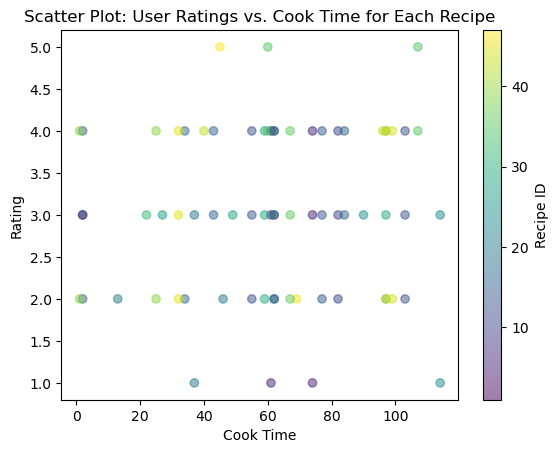

In [17]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these values with your actual database credentials
db_config = {
    'host': '127.0.0.1',
    'user': 'root',
    'password': '',
    'database': 'recipe_db'
}

# Connect to the database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query 1: Scatter Plot - Example: User Ratings vs. Recipe ID
query_scatter = """
    SELECT rec.Recipe_ID, r.rating, ci.Cook_time
    FROM Rate_by r
    JOIN Suggestion s ON r.User_ID = s.Preference_ID
    JOIN Recipe rec ON s.Suggestion_ID = rec.Suggestion_ID
    JOIN Cooking_instruction ci ON rec.Recipe_ID = ci.Recipe_ID;
"""
cursor.execute(query_scatter)
result_scatter = cursor.fetchall()
result_scatter

# Extracting data for scatter plot
recipe_ids, ratings, cook_times = zip(*result_scatter)

# Plotting scatter plot
plt.scatter(cook_times, ratings, c=recipe_ids, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot: User Ratings vs. Cook Time for Each Recipe')
plt.xlabel('Cook Time')
plt.ylabel('Rating')
plt.colorbar(label='Recipe ID')
plt.show()

# Close the connection
cursor.close()
conn.close()

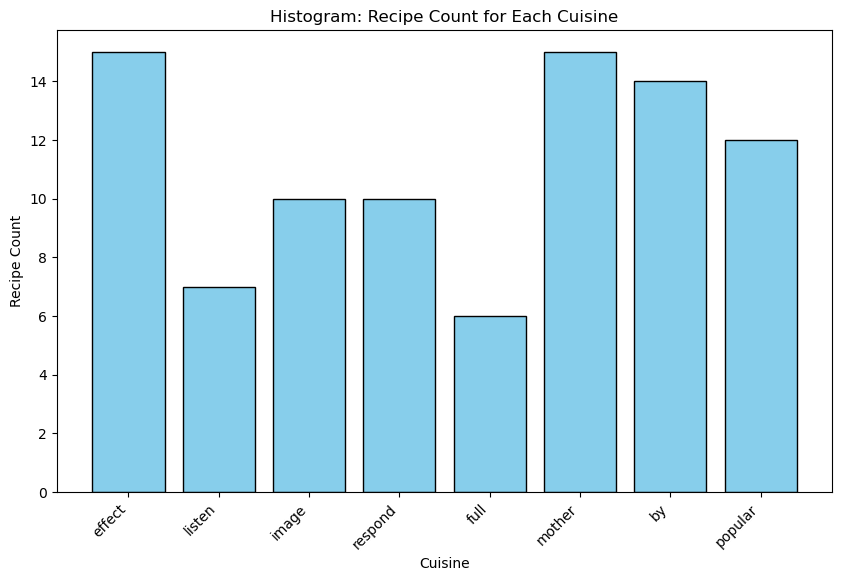

In [18]:

# Connect to the database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query
query_cuisine_recipe_count = """
SELECT Cuisines.Cousine, COUNT(Recipe.Recipe_ID) AS RecipeCount
FROM Recipe
JOIN Includes_Cuisine ON Recipe.Recipe_ID = Includes_Cuisine.Recipe_ID
JOIN Cuisines ON Includes_Cuisine.Cuisine_ID = Cuisines.Cousine_ID
GROUP BY Cuisines.Cousine;
"""

cursor.execute(query_cuisine_recipe_count)
result_cuisine_recipe_count = cursor.fetchall()

# Extracting data for histogram
cuisines, recipe_counts = zip(*result_cuisine_recipe_count)

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.bar(cuisines, recipe_counts, color='skyblue', edgecolor='black')
plt.title('Histogram: Recipe Count for Each Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Recipe Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Close the connection
cursor.close()
conn.close()


<Figure size 1000x600 with 0 Axes>

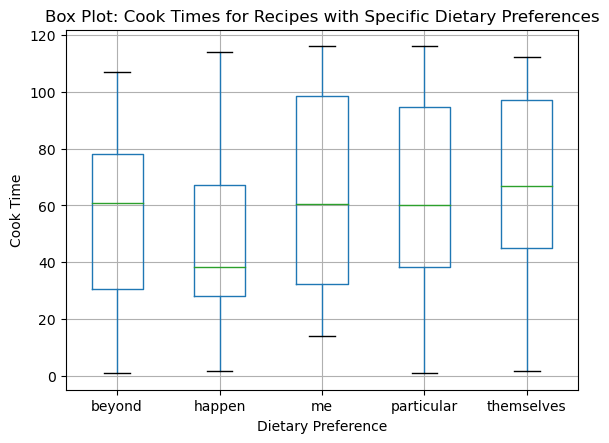

In [19]:
import pandas as pd

# Connect to the database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query for Box Plot
query_boxplot = """
SELECT Dietary_preference.Dietary_preference, Cooking_instruction.Cook_time
FROM Cooking_instruction
JOIN Recipe ON Cooking_instruction.Recipe_ID = Recipe.Recipe_ID
JOIN Includes_Dietary_preference ON Recipe.Recipe_ID = Includes_Dietary_preference.Recipe_ID
JOIN Dietary_preference ON Includes_Dietary_preference.Dietary_preference_ID = Dietary_preference.Dietary_preference_ID;
"""


# Execute queries
cursor.execute(query_boxplot)
result_boxplot = cursor.fetchall()



# Close the connection
cursor.close()
conn.close()

# Convert results to Pandas DataFrame for easier plotting
df_boxplot = pd.DataFrame(result_boxplot, columns=['Dietary Preference', 'Cook Time'])


# Plotting Box Plot
plt.figure(figsize=(10, 6))
df_boxplot.boxplot(by='Dietary Preference', column='Cook Time')
plt.title('Box Plot: Cook Times for Recipes with Specific Dietary Preferences')
plt.suptitle('')  # Suppress default title
plt.xlabel('Dietary Preference')
plt.ylabel('Cook Time')
plt.show()



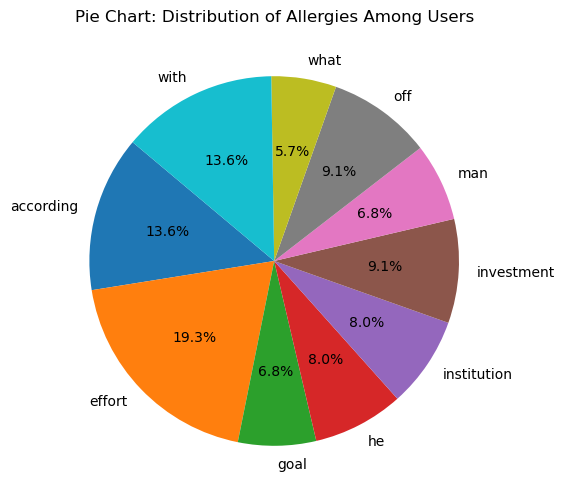

In [15]:
# Connect to the database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()
# Query for Pie Chart
query_piechart = """
SELECT Allergies.Allergy, COUNT(DISTINCT User_profile.User_ID) AS UserCount
FROM Allergies
LEFT JOIN Is_restricted_by_allergy ON Allergies.Allergy_ID = Is_restricted_by_allergy.Allergy_ID
LEFT JOIN User_preference ON Is_restricted_by_allergy.Preference_ID = User_preference.Preference_ID
LEFT JOIN User_profile ON User_preference.Preference_ID = User_profile.Preference_ID
GROUP BY Allergies.Allergy;
"""

cursor.execute(query_piechart)
result_piechart = cursor.fetchall()
df_piechart = pd.DataFrame(result_piechart, columns=['Allergy', 'User Count'])
# Plotting Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(df_piechart['User Count'], labels=df_piechart['Allergy'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Distribution of Allergies Among Users')
plt.show()
cursor.close()
conn.close()
